In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [5]:
df = pd.read_csv('Classified Data')

In [7]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


<h1>Standardizing dataset</h1>

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis = 1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis = 1))

In [15]:
df_features = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [17]:
df_features

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,1.719927,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,1.723391,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,1.726856,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


<h1>Prediction</h1>

In [20]:
X= df_features
y = df['TARGET CLASS']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)
predict

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,

<h1>Evaluation</h1>

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[159  14]
 [ 14 143]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       173
           1       0.91      0.91      0.91       157

    accuracy                           0.92       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.92      0.92      0.92       330



<h1>Finding new K value</h1>

In [54]:
error_rate = []
for i in range(1,50):
    knn_e = KNeighborsClassifier(n_neighbors=i)
    knn_e.fit(X_train,y_train)
    predict_e = knn_e.predict(X_test)
    error_rate.append(np.mean(predict_e != y_test))

In [51]:
error_rate

[0.08484848484848485,
 0.09090909090909091,
 0.07272727272727272,
 0.07575757575757576,
 0.07575757575757576,
 0.06363636363636363,
 0.07272727272727272,
 0.06363636363636363,
 0.06666666666666667,
 0.06363636363636363,
 0.05454545454545454,
 0.05454545454545454,
 0.06363636363636363,
 0.06363636363636363,
 0.05757575757575758,
 0.06060606060606061,
 0.05454545454545454,
 0.06060606060606061,
 0.0696969696969697,
 0.051515151515151514,
 0.051515151515151514,
 0.048484848484848485,
 0.045454545454545456,
 0.045454545454545456,
 0.03939393939393939,
 0.04242424242424243,
 0.048484848484848485,
 0.04242424242424243,
 0.048484848484848485,
 0.04242424242424243,
 0.048484848484848485,
 0.04242424242424243,
 0.048484848484848485,
 0.048484848484848485,
 0.051515151515151514,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.045454545454545456,
 0.048484848484848485,
 0.045454545454545456,
 0.045454545454545456,
 0.045454545454545456,
 0.0454545454

Text(0, 0.5, 'Error Rate')

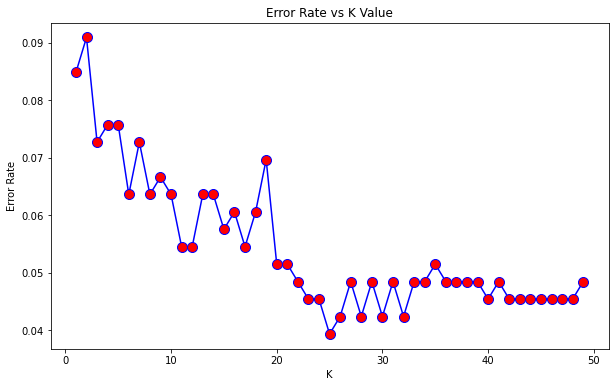

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<h1>Prediction and Evaluation with new K value</h1>

In [56]:
knn_new = KNeighborsClassifier(n_neighbors=25)
knn_new.fit(X_train,y_train)
predict_new = knn_new.predict(X_test)

In [57]:
print(confusion_matrix(y_test,predict_new))
print(classification_report(y_test,predict_new))

[[167   6]
 [  7 150]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       173
           1       0.96      0.96      0.96       157

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330

